In [1]:
import pandas as pd
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.objects.log.util import sorting
from pm4py.algo.filtering.log.attributes import attributes_filter
from pm4py.algo.organizational_mining.roles import algorithm as roles_discovery
import numpy as np
from pm4py.statistics.eventually_follows.log import get as efg_get
from pm4py.algo.filtering.log import ltl as ll
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery


'''path = 'Production_Data.csv' # Enter path to the csv file
data = pd.read_csv(path, sep=',')
cols = ['case:concept:name','concept:name','time:timestamp']
data.columns = cols
data['time:timestamp'] = pd.to_datetime(data['time:timestamp'])
data['concept:name'] = data['concept:name'].astype(str)

log = log_converter.apply(data, variant=log_converter.Variants.TO_EVENT_LOG)'''

"path = 'Production_Data.csv' # Enter path to the csv file\ndata = pd.read_csv(path, sep=',')\ncols = ['case:concept:name','concept:name','time:timestamp']\ndata.columns = cols\ndata['time:timestamp'] = pd.to_datetime(data['time:timestamp'])\ndata['concept:name'] = data['concept:name'].astype(str)\n\nlog = log_converter.apply(data, variant=log_converter.Variants.TO_EVENT_LOG)"

In [2]:

log_csv = pd.read_csv('Production_Data.csv', sep=',')
log_csv['row_num'] = np.arange(len(log_csv))+2
#print(log_csv)
log_csv.rename(columns={'Case ID': 'case:Case ID'}, inplace=True)
log_csv.rename(columns={'Start Timestamp': 'time:timestamp'}, inplace=True)
log_csv.rename(columns={'Activity': 'concept:name'}, inplace=True)

parameters = {log_converter.Variants.TO_EVENT_LOG.value.Parameters.CASE_ID_KEY: 'case:Case ID',
             
              
             }
'''parameters={constants.PARAMETER_CONSTANT_CASEID_KEY: "Case ID",
                                                   constants.PARAMETER_CONSTANT_ACTIVITY_KEY: "Activity",
                                                    constants.PARAMETER_CONSTANT_START_TIMESTAMP_KEY:"Start Timestamp",
                                                    constants.PARAMETER_CONSTANT_RESOURCE_KEY:"Resource",
                                                    constants.PARAMETER_CONSTANT_TIMESTAMP_KEY:"Complete Timestamp"
                                                   }'''
event_log = log_converter.apply(log_csv, parameters=parameters,variant=log_converter.Variants.TO_EVENT_LOG)
ls = sorting.sort_timestamp(event_log,"time:timestamp", False)
ls

[{'attributes': {'Case ID': 'Case 190', 'concept:name': 'Case 190'}, 'events': [{'concept:name': 'Packing', 'Resource': 'Packing', 'time:timestamp': '1/10/2012 0:00:00', 'Complete Timestamp': '1/10/2012 1:00:00', 'Span': '000:00', 'Work Order  Qty': 16, 'Part Desc.': 'Seal Head', 'Worker ID': 'ID4820', 'Report Type': 'D', 'Qty Completed': 7, 'Qty Rejected': 0, 'Qty for MRB': 0, 'Rework': nan, 'duration': '00:00.0', 'row_num': 1154}, '..', {'concept:name': 'Turning & Milling Q.C.', 'Resource': 'Quality Check 1', 'time:timestamp': '2/14/2012 9:18:00', 'Complete Timestamp': '2/14/2012 11:10:00', 'Span': '001:52', 'Work Order  Qty': 16, 'Part Desc.': 'Seal Head', 'Worker ID': 'ID4493', 'Report Type': 'D', 'Qty Completed': 0, 'Qty Rejected': 0, 'Qty for MRB': 0, 'Rework': nan, 'duration': '52:00.0', 'row_num': 1158}]}, '....', {'attributes': {'Case ID': 'Case 130', 'concept:name': 'Case 130'}, 'events': [{'concept:name': 'Turning & Milling - Machine 6', 'Resource': 'Machine 6 - Turning & Mi

In [3]:
A='Fix - Machine 3'
B='Round Grinding - Machine 3'
#ll.ltl_checker.four_eyes_principle(ls, A, B)

ll.ltl_checker.attr_value_different_persons(ls, B)


[]

In [4]:
cols=['Detected Weakness Row','Case ID','Weakness Type (AF/PA)','Weakness ID','Weakness Origin', 'Weakness Time','Weakness Information','Weakness Measurement', 'Weakness Level']
df=pd.DataFrame(columns=cols)
logSorted=[]
#len(cols)

In [5]:
def Unwanted_Activity(log, blacklist):
    global df, cols
    print("Unwanted activity function")
    for case_index, case in enumerate(log):
        #print(case.attributes['Case ID'] )
        for event_index, event in enumerate(case):
            #print (event_index,event)
            if(event["Activity"] in blacklist):
                #case.attributes['Case ID']+"-> Event "+str(event_index+1)print("Unwanted activity=> activity: %s -> case: %s that started @ %s " % (event["Activity"], event["Case ID"], event["Start Timestamp"]))
                row={cols[0]:event['row_num'], cols[1]: case.attributes['Case ID'], cols[2]:'AF', cols[3]:'1',cols[4]:'Expert',cols[5]:event["Start Timestamp"],cols[6]:'Unwanted activity \"'+event["Activity"]+'\"',cols[7]:'In the case', cols[8]:'Event level'}
                df=df.append(row, ignore_index=True)



In [6]:
#Checks for the largest common prefix  
def lcp(s, t):  
    n = min(len(s),len(t));  
    for i in range(0,n):  
        if(s[i] != t[i]):  
            return s[0:i];  
        else:  
            return s[0:n];  

def Find_sequence(eventList):
    lrs="";  
    n = len(eventList);  
    for i in range(0,n):  
        for j in range(i+1,n):  
            #Checks for the largest common factors in every substring  
            x = lcp(eventList[i:n],eventList[j:n]);  
                #If the current prefix is greater than previous one   
                #then it takes the current one as longest repeating sequence  
            if(len(x) > len(lrs)):
                lrs=x;
    
          
            
    if(len(set(lrs))>1):
        return (lrs);  
    
def Backloop(log):
    print("Backloop function")
    global df
    for case_index, case in enumerate(log):
        eventList=[]
        lrs=""
        indexList=[]
        for event_index, event in enumerate(case):
            eventList.append(event["Activity"])  
        if(Find_sequence(eventList) is not None ):
            lrs=Find_sequence(eventList)
            #print("Repeating sequence for events in case:",case.attributes['concept:name']," is: ", lrs)  
            row={cols[0]:event['row_num'], cols[1]: case.attributes['Case ID'], cols[2]:'AF', cols[3]:'2',cols[4]:'Automatic detection',cols[5]:'',cols[6]:'Backloop {'+''.join(lrs)+'}',cols[7]:'In the case',cols[8]:'Case level'}
            df=df.append(row, ignore_index=True)
    #for trace in event_log:
    #    print(trace)

In [7]:
def find_duplicate_events(x): 
    _size = len(x) 
    duplicate_list = [] 
    for i in range(_size): 
        k = i + 1
        for j in range(k, _size): 
            if x[i] == x[j] and x[i] not in duplicate_list: 
                duplicate_list.append(x[i]) 
    return duplicate_list

def Redundant_Activity(log):
    global df
    print("Redundant_Activity function")
    for case_index, case in enumerate(log):
        #print("\n Case Id: %s" % ( case.attributes["concept:name"]))
        event_list=[]
        
        for event_index, event in enumerate(case):
            #print("event start time: %s  event activity: %s" % (event["Start Timestamp"], event["Activity"]))
            event_list.append(event["Activity"])  
        duplicateEventList=[]
        duplicateEventList=find_duplicate_events(event_list)
        #print ("The events which got repeated in the trace are",duplicateEventList)
        if(len(duplicateEventList)>0):
            row={cols[0]:event['row_num'], cols[1]: case.attributes['Case ID'], cols[2]:'AF', cols[3]:'3',cols[4]:'Automatic detection',cols[5]:"",cols[6]:'Redundant Activities list: \"'+''.join(duplicateEventList)+'\"',cols[7]:'In the case', cols[8]:'Case Level'}
            df=df.append(row, ignore_index=True)
            

In [8]:
def Interface(log):
    print("Interface function")
    global df
    for case_index, case in enumerate(log):
        d={}
        l=""
        #print("\n Case Id: %s" % ( case.attributes["concept:name"]))
        
        '''for event_index, event in enumerate(case):
            if( len(d)!=0 and event["Activity"] in d.keys() and event["Resource"]!= d[event["Activity"]]):
                print("The resource has changed for the activity: %s from %s to %s"%(event["Activity"], d[event["Activity"]], event["Resource"]))
            d[event["Activity"]]=event["Resource"]'''
        prev=""
        for event_index, event in enumerate(case):
            if( prev!="" and  event["Resource"]!= prev):
                #print("The resource has changed for the activity: \"%s\" from \"%s\" to \"%s\""%(event["Activity"], prev, event["Resource"]))
                row={cols[0]:event['row_num'], cols[1]: case.attributes['Case ID'], cols[2]:'AF', cols[3]:'4',cols[4]:'Automatic detection',cols[5]:event["Start Timestamp"],cols[6]:'Change of interface for activity '+event["Activity"]+' from ' +prev+' to '+ event["Resource"],cols[7]:'In the case',cols[8]:'Event Level'}
                df=df.append(row, ignore_index=True)


            prev=event["Resource"]
            

In [9]:
def Idle_time(log,maxTime):
    global df
    print("Idle_time function")
    for case_index, case in enumerate(log):
        #print("\n Case Id: %s" % ( case.attributes["concept:name"]))
        prev_end_timestamp=0
        idle_time=0
        prev_activity=""
        for event_index, event in enumerate(case):
            if(prev_end_timestamp!=0):
                idle_time=pd.to_datetime(event["Start Timestamp"], format = "%m/%d/%Y %H:%M:%S")-prev_end_timestamp
            #print("Idle time between previous activity:%s and current activity:%s is %s"%(prev_activity, event["Activity"], idle_time))
            #if(type(idle_time)!= int):
            #    print(idle_time.total_seconds  )#idle_time/np.timedelta64(1,'s'))
            if(type(idle_time)!= int and idle_time.total_seconds()>maxTime):
                #.total_seconds()>7200) :
                row={cols[0]:event['row_num'], cols[1]: case.attributes['Case ID'], cols[2]:'PA', cols[3]:'6',cols[4]:'Expert',cols[5]:event["Start Timestamp"],cols[6]:'Idletime between '+prev_activity+' to ' +event["Activity"]+' is '+ str(idle_time),cols[7]:'In the case',cols[8]:'Event level'}
                df=df.append(row, ignore_index=True)
            prev_end_timestamp=pd.to_datetime(event["Complete Timestamp"], format = "%m/%d/%Y %H:%M:%S") 
            prev_activity=event["Activity"]
            

In [10]:
def Variance_of_process_times(log):
    global df
    print("Variance_of_process_times function")
    d={}#mean1(log)
    l=[]
    for case_index, case in enumerate(log): 
        for event_index, event in enumerate(case):
            if event["Activity"] not in d.keys():
                l=[]
            else:
                l=d[event["Activity"]]
            l.append( (pd.to_datetime(event["Complete Timestamp"], format = "%m/%d/%Y %H:%M:%S")-pd.to_datetime(event["Start Timestamp"], format = "%m/%d/%Y %H:%M:%S"))/ pd.Timedelta(hours=1))
            d[event["Activity"]]=(l)
    variance_dict={}
    for k,v in d.items():
        variance_dict[k]= (min(v), max(v),np.mean(v) ,np.var(v))
        row={cols[0]:"All Activities", cols[1]: k, cols[2]:'PA', cols[3]:'7',cols[4]:'Automatic detection',cols[5]:'',cols[6]:'(Min, Max, Average, Variance) for current activity:'+str((min(v), max(v),np.mean(v) ,np.var(v))),cols[7]:'In the Activity',cols[8]:'Activity Level'}
        df=df.append(row, ignore_index=True)

In [11]:
def Bottleneck(log):
    global df
    print("Bottleneck function")
    '''for case_index, case in enumerate(log):
        print("\n Case Id: %s" % ( case.attributes["concept:name"]))
        duration=0 
        a=""
        max_duration=0
        for event_index, event in enumerate(case):
            duration=pd.to_datetime(event["Complete Timestamp"], format = "%m/%d/%Y %H:%M:%S")-pd.to_datetime(event["Start Timestamp"], format = "%m/%d/%Y %H:%M:%S")
            if(max_duration==0 or duration>max_duration):
                max_duration=duration
                a=event["Activity"]
                
        print("Bottleneck Activity at case level:%s took maximum time of %s to complete"%(a,max_duration ))'''
    duration=0 
    a=""
    max_duration=0
    for case_index, case in enumerate(log):
        for event_index, event in enumerate(case):
            duration=pd.to_datetime(event["Complete Timestamp"], format = "%m/%d/%Y %H:%M:%S")-pd.to_datetime(event["Start Timestamp"], format = "%m/%d/%Y %H:%M:%S")
            if(max_duration==0 or duration>max_duration):
                max_duration=duration
                a=event["Activity"]
    
    print("Bottleneck Activity on log level:%s took maximum time of %s to complete"%(a,max_duration ))
    row={cols[0]:"All Activities", cols[1]: a, cols[2]:'PA', cols[3]:'8',cols[4]:'Automatic detection',cols[5]:'',cols[6]:'Activity took maximum time of '+str(max_duration),cols[7]:'In the Activity',cols[8]:'Log Level'}
    df=df.append(row, ignore_index=True)
    

In [12]:
def Parallelizable_tasks_CaseLevel():
    global df
    print("Parallelizable_tasks_CaseLevel function\n\n")
    log_csv3 = pd.read_csv('Production_Data.csv', sep=',')
    log_csv3.rename(columns={'Activity': 'concept:name'}, inplace=True)
    parameters = {log_converter.Variants.TO_EVENT_LOG.value.Parameters.CASE_ID_KEY: 'Case ID'}
    event_log3 = log_converter.apply(log_csv3, parameters=parameters, variant=log_converter.Variants.TO_EVENT_LOG)
    event_log3 = sorting.sort_timestamp(event_log3,"Start Timestamp", False)
    print("Eventlog3",event_log3)
    for case_index, case in enumerate(event_log3):
        #print(case)
        tracefilter_log_pos = attributes_filter.apply(event_log3, [case.attributes["concept:name"]],
                                          parameters={attributes_filter.Parameters.ATTRIBUTE_KEY : "Case ID", attributes_filter.Parameters.POSITIVE: True})
        
        dfg_simple3 = dfg_discovery.apply(tracefilter_log_pos)
        l=[]
        for k in dfg_simple3.keys():
            if(k[0]!=k[1]):
                if (k[1],k[0]) in dfg_simple3.keys():
                    l.append((k[1],k[0]))
        l1=[]
        for i in l:
            if (i[1],i[0]) in l:
                l1.append((i[0],i[1]))
                l.remove((i[1],i[0]))
                l.remove((i[0],i[1]))
        if(len(l)>0)   :  
            
            row={cols[0]:case.attributes['concept:name'], cols[1]: case.attributes['concept:name'], cols[2]:'AF', cols[3]:'9',cols[4]:'Automatic detection',cols[5]:'',cols[6]:'Parallelizable tasks :'+''.join(str(l1)),cols[7]:'In the case',cols[8]:'Case level'}
            df=df.append(row, ignore_index=True)
            #print("\n\nParallelizable tasks for Case:",case.attributes["concept:name"]," are => ", end=" ")
            #print(l1)
        

In [13]:
def Eventually_follows(lt):
    global df
    log_csv = pd.read_csv('Production_Data.csv', sep=',')
    log_csv['row_num'] = np.arange(len(log_csv))+2
    #print(log_csv)
    log_csv.rename(columns={'Case ID': 'case:Case ID'}, inplace=True)
    log_csv.rename(columns={'Start Timestamp': 'time:timestamp'}, inplace=True)
    log_csv.rename(columns={'Activity': 'concept:name'}, inplace=True)

    parameters = {log_converter.Variants.TO_EVENT_LOG.value.Parameters.CASE_ID_KEY: 'case:Case ID',


                 }
    '''parameters={constants.PARAMETER_CONSTANT_CASEID_KEY: "Case ID",
                                                       constants.PARAMETER_CONSTANT_ACTIVITY_KEY: "Activity",
                                                        constants.PARAMETER_CONSTANT_START_TIMESTAMP_KEY:"Start Timestamp",
                                                        constants.PARAMETER_CONSTANT_RESOURCE_KEY:"Resource",
                                                        constants.PARAMETER_CONSTANT_TIMESTAMP_KEY:"Complete Timestamp"
                                                       }'''
    event_log = log_converter.apply(log_csv, parameters=parameters,variant=log_converter.Variants.TO_EVENT_LOG)
    ls = sorting.sort_timestamp(event_log,"time:timestamp", False)
    
    efg_graph = efg_get.apply(ls)
    followList=[]
    for e in efg_graph.keys():
        if e in lt:
            print("Followed times:",(e,efg_graph[e]))
            followList.append(e)
            
            
            
    for case_index, case in enumerate(ls):
        #print(case.attributes['Case ID'] )
        eList=[]
        for event_index, event in enumerate(case):
            #print (event_index,event)
            eList.append((event["concept:name"],event["row_num"],case.attributes['Case ID'],event["time:timestamp"]))
    
        #print("Elist", eList)
    
        for l1,l2 in lt:
            prev_e=[]
            follow_e=[]
            found_l1=False
            for e in eList:
                if(l1 == e[0]):
                    prev_e=e 
                    found_l1=True
                if(found_l1 and l2 == e[0]):
                    follow_e=e
                    break
            if(len(follow_e)>0):
                print (prev_e, follow_e)
                row={cols[0]:str(prev_e[1])+", "+str(follow_e[1]), cols[1]: prev_e[2], cols[2]:'AF', cols[3]:'10',cols[4]:'Expert',cols[5]:prev_e[3]+", "+follow_e[3],cols[6]:'Unwanted follow \"'+prev_e[0]+'\", \"'+follow_e[0]+'\"',cols[7]:'In the case', cols[8]:'Case level'}
                df=df.append(row, ignore_index=True)


        

In [14]:
def Roles_discovery():
    global df
    print("Roles_discovery function\n\n")
    log_csv3 = pd.read_csv('Production_Data.csv', sep=',')
    log_csv3.rename(columns={'Activity': 'concept:name'}, inplace=True)
    log_csv3.rename(columns={'Resource': 'org:resource'}, inplace=True)
    roles = roles_discovery.apply(log_csv3)
    for r in roles:
        print(r)



In [37]:
def main():
    log_csv = pd.read_csv('Production_Data.csv', sep=',')
    log_csv['row_num'] = np.arange(len(log_csv))+2
    log_csv.rename(columns={'Case ID': 'case:Case ID'}, inplace=True)
    global logSorted
    parameters = {log_converter.Variants.TO_EVENT_LOG.value.Parameters.CASE_ID_KEY: 'case:Case ID',


                 }
    '''parameters={constants.PARAMETER_CONSTANT_CASEID_KEY: "Case ID",
                                                       constants.PARAMETER_CONSTANT_ACTIVITY_KEY: "Activity",
                                                        constants.PARAMETER_CONSTANT_START_TIMESTAMP_KEY:"Start Timestamp",
                                                        constants.PARAMETER_CONSTANT_RESOURCE_KEY:"Resource",
                                                        constants.PARAMETER_CONSTANT_TIMESTAMP_KEY:"Complete Timestamp"
                                                       }'''
    event_log = log_converter.apply(log_csv, parameters=parameters,variant=log_converter.Variants.TO_EVENT_LOG)
    logSorted = sorting.sort_timestamp(event_log,"Start Timestamp", False)
    
    blacklist=[ 'Lapping - Machine 1','Turning & Milling - Machine 8']
    
    #Unwanted_Activity(logSorted, blacklist)
    Backloop(logSorted)
    #Redundant_Activity(logSorted) 
    #Interface(logSorted)
    #maxTime=86400
    #Idle_time(logSorted, maxTime)
    #Variance_of_process_times(logSorted)
    #Bottleneck(logSorted)  
    ##Parallelizable_tasks_loglevel()
    #Parallelizable_tasks_CaseLevel()
    
    #dontFollowList=[('Setup - Machine 8', 'Packing')]
    #Eventually_follows(dontFollowList)
    
    #Roles_discovery()
    

In [38]:
main()

Backloop function


In [39]:
df




Detected Weakness Row   Case ID Weakness Type (AF/PA) Weakness ID  \
0                    1158  Case 190                    AF           2   
1                    1480  Case 203                    AF           2   
2                    1506  Case 207                    AF           2   
3                    1816  Case 225                    AF           2   
4                    2273  Case 248                    AF           2   
..                    ...       ...                   ...         ...   
182                  2733  Case 264                    AF           2   
183                   641  Case 138                    AF           2   
184                  4176   Case 80                    AF           2   
185                  1490  Case 205                    AF           2   
186                  3692   Case 56                    AF           2   

         Weakness Origin Weakness Time  \
0    Automatic detection                 
1    Automatic detection                 
2    Automatic detection                 
3    Automatic detection                 
4    Automatic detection                 
..                   ...           ...   
182  Automatic detection                 
183  Automatic detection                 
184  Automatic detection                 
185  Automatic detection                 
186  Automatic detection                 

                                  Weakness Information Weakness Measurement  \
0    Backloop {Final Inspection Q.C.Turning & Milli...          In the case   
1    Backloop {Lapping - Machine 1Flat Grinding - M...          In the case   
2    Backloop {Turning & Milling - Machine 6Turning...          In the case   
3    Backloop {Lapping - Machine 1Lapping - Machine...          In the case   
4    Backloop {Flat Grinding - Machine 11Flat Grind...          In the case   
..                                                 ...                  ...   
182  Backloop {Turning & Milling - Machine 6Turning...          In the case   
183  Backloop {Turning & Milling - Machine 4Turning...          In the case   
184  Backloop {Lapping - Machine 1Lapping - Machine...          In the case   
185  Backloop {Round Grinding - ManualRound Grindin...          In the case   
186  Backloop {Turning - Machine 8Turning - Machine...          In the case   

    Weakness Level  
0       Case level  
1       Case level  
2       Case level  
3       Case level  
4       Case level  
..             ...  
182     Case level  
183     Case level  
184     Case level  
185     Case level  
186     Case level  

[187 rows x 9 columns]

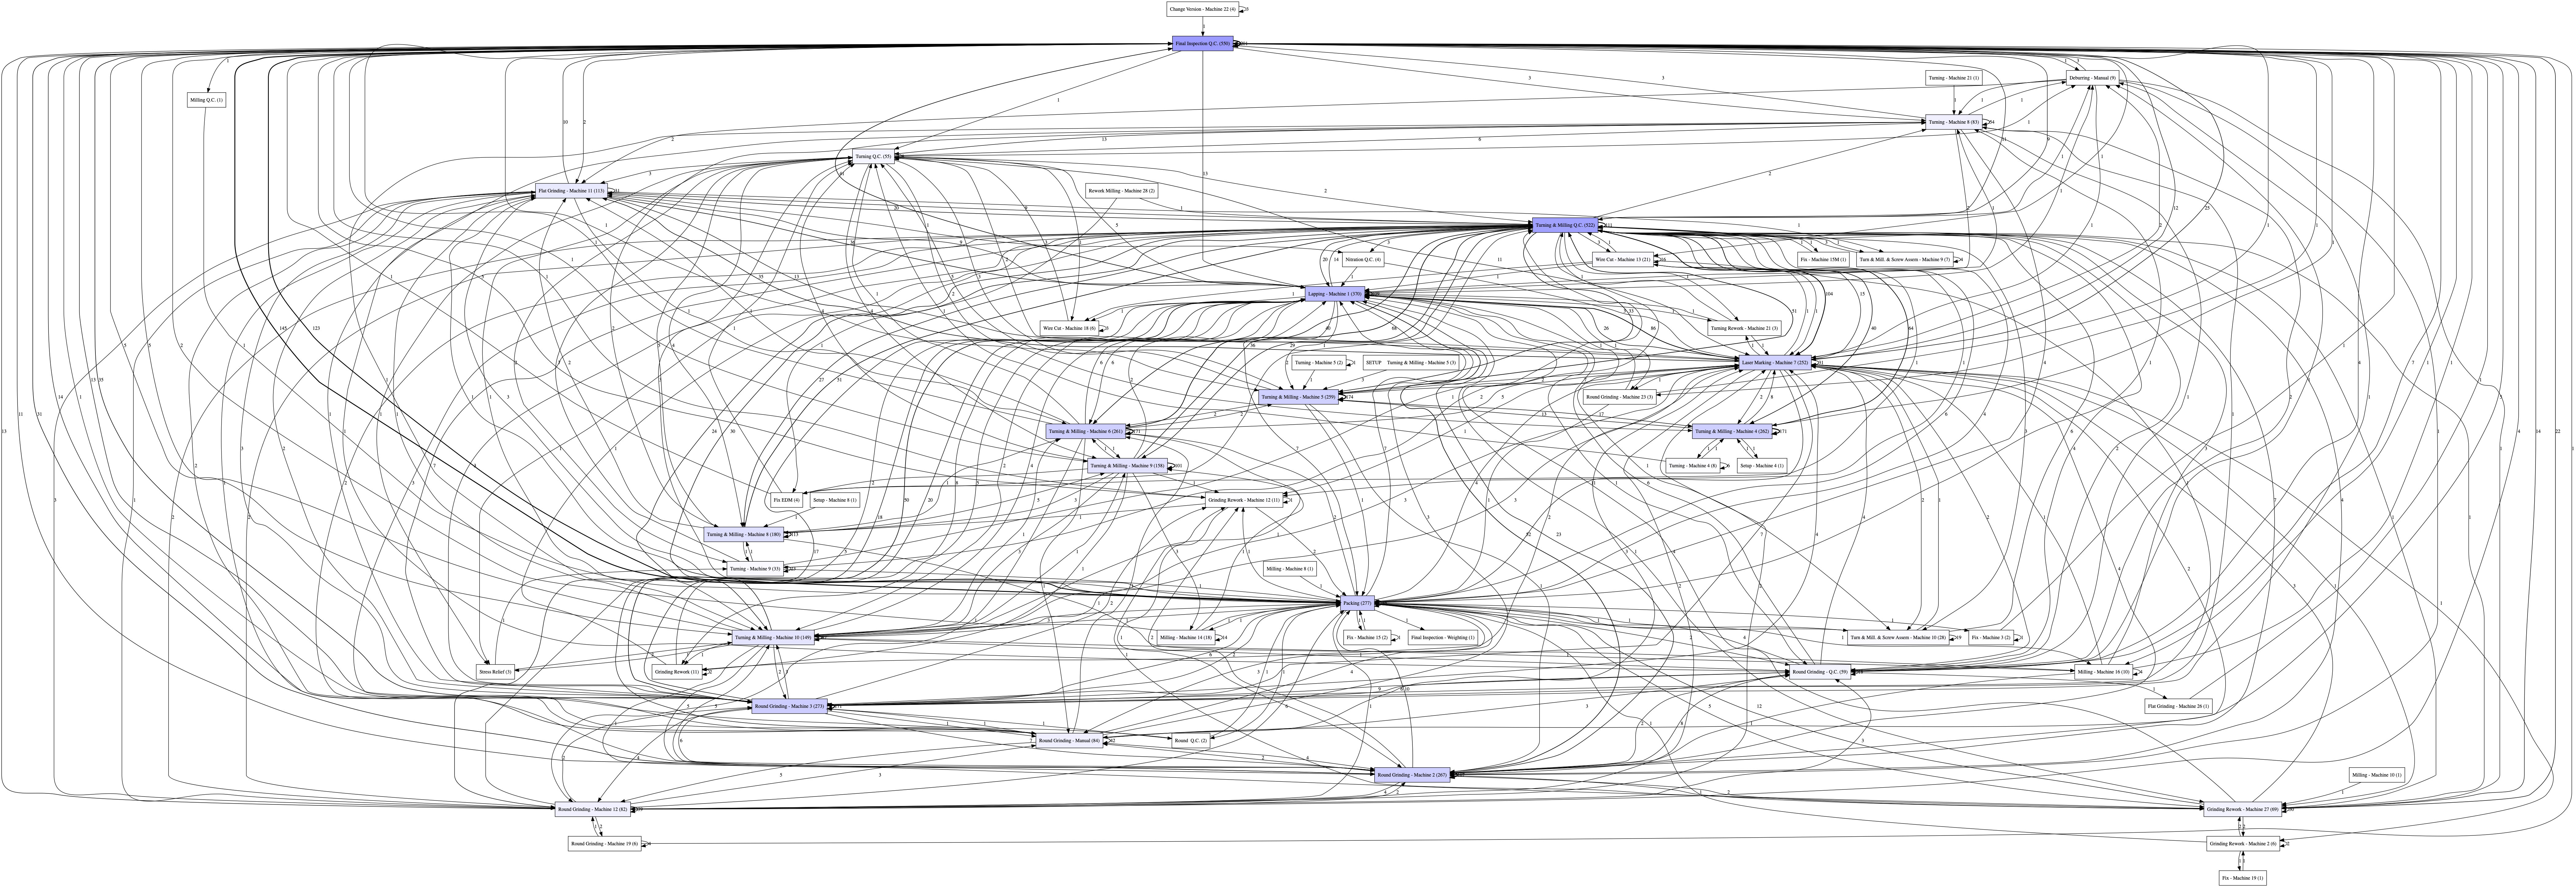

In [57]:
global logSorted
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
log_csv3 = pd.read_csv('Production_Data.csv', sep=',')
log_csv3.rename(columns={'Activity': 'concept:name','Start Timestamp':'time:timestamp'}, inplace=True)
log_csv3["time:timestamp"]=log_csv3["time:timestamp"].apply(pd.to_datetime)
parameters = {log_converter.Variants.TO_EVENT_LOG.value.Parameters.CASE_ID_KEY: 'Case ID'}
event_log3 = log_converter.apply(log_csv3, parameters=parameters, variant=log_converter.Variants.TO_EVENT_LOG)
event_log3 = sorting.sort_timestamp(event_log3,"time:timestamp", False)

#tracefilter_log_pos = attributes_filter.apply(event_log3, [case.attributes["concept:name"]],
#                                          parameters={attributes_filter.Parameters.ATTRIBUTE_KEY : "Case ID", attributes_filter.Parameters.POSITIVE: True})
        
dfg_simple3 = dfg_discovery.apply(event_log3,  variant=dfg_discovery.Variants.FREQUENCY)
#print(dfg_simple3)

from pm4py.visualization.dfg import visualizer as dfg_visualization

#dfg = dfg_discovery.apply(logSorted, variant=dfg_discovery.Variants.PERFORMANCE)
gviz = dfg_visualization.apply(dfg_simple3, log=event_log3, variant=dfg_visualization.Variants.FREQUENCY)
dfg_visualization.view(gviz)

In [26]:
df[df.columns[6]][1]

IndexError: index out of bounds

In [36]:
df.drop(df.index, inplace=True)

In [20]:
ls

[{'attributes': {'Case ID': 'Case 190', 'concept:name': 'Case 190'}, 'events': [{'concept:name': 'Packing', 'Resource': 'Packing', 'time:timestamp': '1/10/2012 0:00:00', 'Complete Timestamp': '1/10/2012 1:00:00', 'Span': '000:00', 'Work Order  Qty': 16, 'Part Desc.': 'Seal Head', 'Worker ID': 'ID4820', 'Report Type': 'D', 'Qty Completed': 7, 'Qty Rejected': 0, 'Qty for MRB': 0, 'Rework': nan, 'duration': '00:00.0', 'row_num': 1154}, '..', {'concept:name': 'Turning & Milling Q.C.', 'Resource': 'Quality Check 1', 'time:timestamp': '2/14/2012 9:18:00', 'Complete Timestamp': '2/14/2012 11:10:00', 'Span': '001:52', 'Work Order  Qty': 16, 'Part Desc.': 'Seal Head', 'Worker ID': 'ID4493', 'Report Type': 'D', 'Qty Completed': 0, 'Qty Rejected': 0, 'Qty for MRB': 0, 'Rework': nan, 'duration': '52:00.0', 'row_num': 1158}]}, '....', {'attributes': {'Case ID': 'Case 130', 'concept:name': 'Case 130'}, 'events': [{'concept:name': 'Turning & Milling - Machine 6', 'Resource': 'Machine 6 - Turning & Mi

In [21]:
import pandas as pd
from pm4py.objects.conversion.log import converter as log_converter

path = 'Production_Data.csv' # Enter path to the csv file
data = pd.read_csv(path, sep=',')

data['Start Timestamp']=pd.to_datetime(data['Start Timestamp'])
data['Complete Timestamp']=pd.to_datetime(data['Complete Timestamp'])
log_csv.rename(columns={'Case ID': 'case:Case ID'}, inplace=True)
log_csv.rename(columns={'Start Timestamp': 'time:timestamp'}, inplace=True)
log_csv.rename(columns={'Activity': 'concept:name'}, inplace=True)
log_csv.rename(columns={'Resource': 'org:resource'}, inplace=True)
parameters = {log_converter.Variants.TO_EVENT_LOG.value.Parameters.CASE_ID_KEY: 'case:Case ID',
             
              
             }

event_log = log_converter.apply(log_csv, parameters=parameters,variant=log_converter.Variants.TO_EVENT_LOG)
ls = sorting.sort_timestamp(event_log,"time:timestamp", False)
print(ls)
'''cols = ['case:concept:name','concept:name','time:timestamp']
#data.columns = cols
data['time:timestamp'] = pd.to_datetime(data['time:timestamp'])
data['concept:name'] = data['concept:name'].astype(str)

log = log_converter.apply(data, variant=log_converter.Variants.TO_EVENT_LOG)'''

[{'attributes': {'Case ID': 'Case 190', 'concept:name': 'Case 190'}, 'events': [{'concept:name': 'Packing', 'org:resource': 'Packing', 'time:timestamp': '1/10/2012 0:00:00', 'Complete Timestamp': '1/10/2012 1:00:00', 'Span': '000:00', 'Work Order  Qty': 16, 'Part Desc.': 'Seal Head', 'Worker ID': 'ID4820', 'Report Type': 'D', 'Qty Completed': 7, 'Qty Rejected': 0, 'Qty for MRB': 0, 'Rework': nan, 'duration': '00:00.0', 'row_num': 1154}, '..', {'concept:name': 'Turning & Milling Q.C.', 'org:resource': 'Quality Check 1', 'time:timestamp': '2/14/2012 9:18:00', 'Complete Timestamp': '2/14/2012 11:10:00', 'Span': '001:52', 'Work Order  Qty': 16, 'Part Desc.': 'Seal Head', 'Worker ID': 'ID4493', 'Report Type': 'D', 'Qty Completed': 0, 'Qty Rejected': 0, 'Qty for MRB': 0, 'Rework': nan, 'duration': '52:00.0', 'row_num': 1158}]}, '....', {'attributes': {'Case ID': 'Case 130', 'concept:name': 'Case 130'}, 'events': [{'concept:name': 'Turning & Milling - Machine 6', 'org:resource': 'Machine 6 - 

"cols = ['case:concept:name','concept:name','time:timestamp']\n#data.columns = cols\ndata['time:timestamp'] = pd.to_datetime(data['time:timestamp'])\ndata['concept:name'] = data['concept:name'].astype(str)\n\nlog = log_converter.apply(data, variant=log_converter.Variants.TO_EVENT_LOG)"

In [22]:
from pm4py.objects.log.util import interval_lifecycle
from pm4py.util import constants
#ls.events['time:timestamp'] #= pd.to_datetime(ls['time:timestamp'])
log = interval_lifecycle.assign_lead_cycle_time(ls, parameters={
    constants.PARAMETER_CONSTANT_START_TIMESTAMP_KEY: "time:timestamp",
    constants.PARAMETER_CONSTANT_TIMESTAMP_KEY: "Complete Timestamp"})
       

AttributeError: 'str' object has no attribute 'timestamp'

In [ ]:
from pm4py.algo.organizational_mining.sna import algorithm as sna
hw_values = sna.apply(ls, variant=sna.Variants.HANDOVER_LOG)
hw_values


In [ ]:
from pm4py.visualization.sna import visualizer as sna_visualizer
gviz_hw_py = sna_visualizer.apply(hw_values, variant=sna_visualizer.Variants.PYVIS)
sna_visualizer.view(gviz_hw_py, variant=sna_visualizer.Variants.PYVIS)
 

In [ ]:
from pm4py.objects.log.util import interval_lifecycle
enriched_log = interval_lifecycle.assign_lead_cycle_time(ls)
